<a href="https://colab.research.google.com/github/MayBornWitIt/Machine_Learning/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [50]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

import warnings
warnings.filterwarnings('ignore')

# **Functions**

In [2]:
# Functions

## Evaluation function
def evaluate_model(true,pred):
    mae = mean_absolute_error(true, pred)
    mape = mean_absolute_percentage_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    print(f' MAE: {mae}, \n MAPE: {mape}, \n MSE: {mse}, \n RMSE: {rmse:}, \n R2: {r2}')

def evluate_classification(model,X_train,X_test,y_train,y_test):
  print(f"Training Accuracy: {model.score(X_train, y_train):.3f}")
  print(f"Test Accuracy: {model.score(X_test, y_test):.3f}")

# **Data**

In [3]:
# Load data
df = pd.read_csv('/content/adult.csv.zip')

# Copy of original data 
df_backup = df.copy()

# Display the first (5) rows of the dataframe
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# **Explore and Clean Data**

In [5]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 observations, and the columns represent 14 features and 1 target variable.


In [6]:
## Display the descriptive statistics for the numeric columns
df.describe(include="number")

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
## Display the descriptive statistics for the non-numeric columns
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [8]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [9]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


In [10]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Confirm now duplicate rows remain
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [11]:
# Fix Non-numeric characters in numeric features
# Change Less than 50K to '0' and Greater than 50k to '1'
df['income'].replace({'<=50K':'0'}, regex=True, inplace=True)
df['income'].replace({'>50K':'1'}, regex=True, inplace=True)
df.loc[:, ['income']].head()

,income
0,0
1,0
2,1
3,1
4,0


In [12]:
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [13]:
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

- Columns 'workclass' and 'occupation' each have an uncatergorized row, to which will be handled after scaling data as to not cause data leakage. Deleting the row is not an option considering it contains lots of data.

In [14]:
# Average age when grouped by gender, education, marital staus & occupation
df.groupby(['gender','education','marital-status','occupation'])['age'].mean()

gender  education     marital-status  occupation       
Female  10th          Divorced        ?                    53.181818
                                      Adm-clerical         51.250000
                                      Craft-repair         41.333333
                                      Exec-managerial      42.250000
                                      Handlers-cleaners    37.333333
                                                             ...    
Male    Some-college  Widowed         Farming-fishing      52.000000
                                      Machine-op-inspct    51.500000
                                      Prof-specialty       64.000000
                                      Sales                69.666667
                                      Transport-moving     68.000000
Name: age, Length: 1673, dtype: float64

Seems there is an average age of divorced females in their early 40's with an 10th grade education in an executive managerial occupation. Whereas, an average age of widowed males in their early 60's with some college education are in a professional specialty occupation.

In [15]:
#Average hours per week grouped by gender and race
df.groupby(['gender','race'])['hours-per-week'].mean()

gender  race              
Female  Amer-Indian-Eskimo    37.108108
        Asian-Pac-Islander    37.241779
        Black                 37.113951
        Other                 35.987097
        White                 36.240412
Male    Amer-Indian-Eskimo    42.326316
        Asian-Pac-Islander    41.256000
        Black                 40.042947
        Other                 41.187251
        White                 42.669407
Name: hours-per-week, dtype: float64

Females whom are of the American Indian Eskimo race are putting in an high average of 37 hours per week. Whereas, males who are of the White race are putting a high average of 43 hours per week.

In [16]:
#Average capital gains grouped by gender and race
df.groupby(['gender','race'])['capital-gain'].mean()

gender  race              
Female  Amer-Indian-Eskimo     380.621622
        Asian-Pac-Islander     587.135397
        Black                  492.951906
        Other                  920.922581
        White                  595.548382
Male    Amer-Indian-Eskimo     641.768421
        Asian-Pac-Islander    2031.559000
        Black                  681.241263
        Other                 1021.697211
        White                 1366.123541
Name: capital-gain, dtype: float64

Interestingly enough Asian Pacific Islander whom are Males average higher capital gains compared to the other races. Females in other races average higher capital gain rates compared to the categorized races mentioned.

# **EDA**

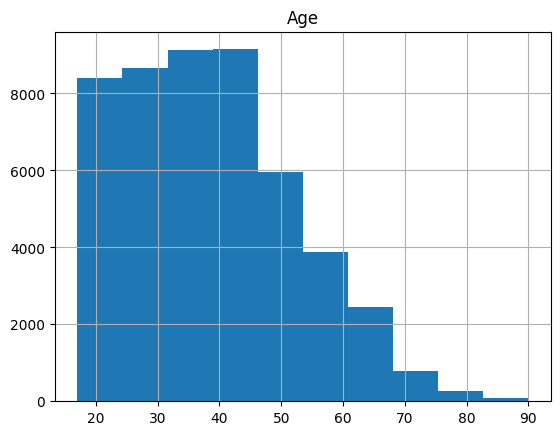

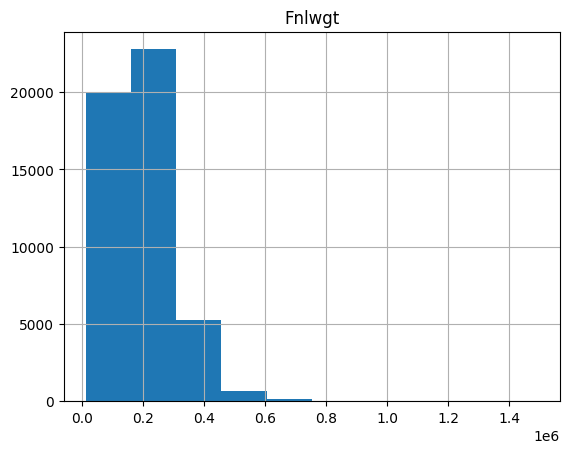

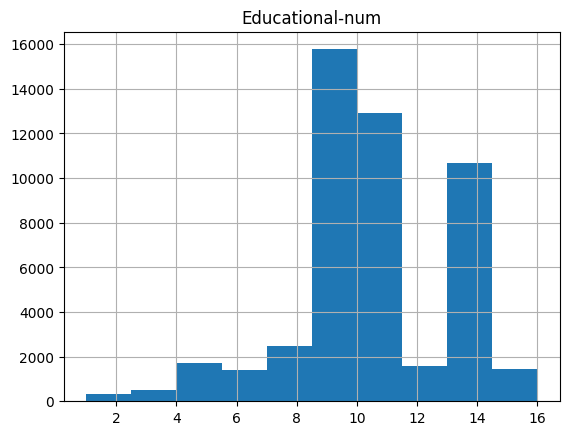

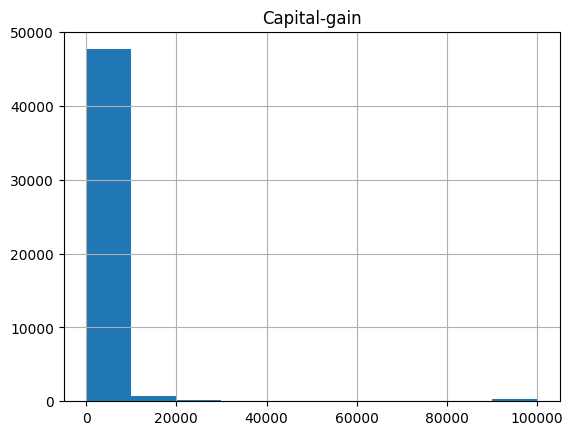

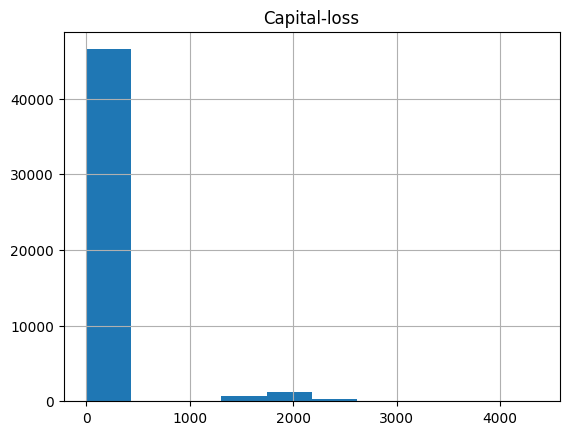

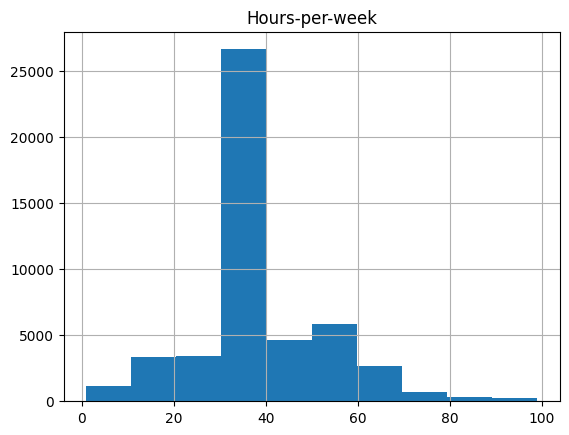

In [17]:
# Explore numeric distributions

for col in df.select_dtypes('number'):
    df[col].hist()
    plt.title(col.capitalize())
    
    plt.show()

In [18]:
# Create a correlation matrix to show relationship between select variables
corr_model = df[['age','educational-num','capital-gain','capital-loss', 'hours-per-week']].corr()
corr_model

,age,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.030635,0.077185,0.056838,0.071223
educational-num,0.030635,1.000000,0.125219,0.080986,0.143915
capital-gain,0.077185,0.125219,1.000000,-0.031475,0.082152
capital-loss,0.056838,0.080986,-0.031475,1.000000,0.054431
hours-per-week,0.071223,0.143915,0.082152,0.054431,1.000000


A correlation coefficient between 0.5 and 0.7 indicates variables that can be considered moderately correlated, while a correlation coefficient whose magnitude is between 0.3 and 0.5 indicates variables that exhibit weak correlation, and .00 through .30 indicates little if any correlation. As is the case with most of our variables. This means no linear relationship between the select variables.

The best way to visualize correlation however, is with a heatmap.

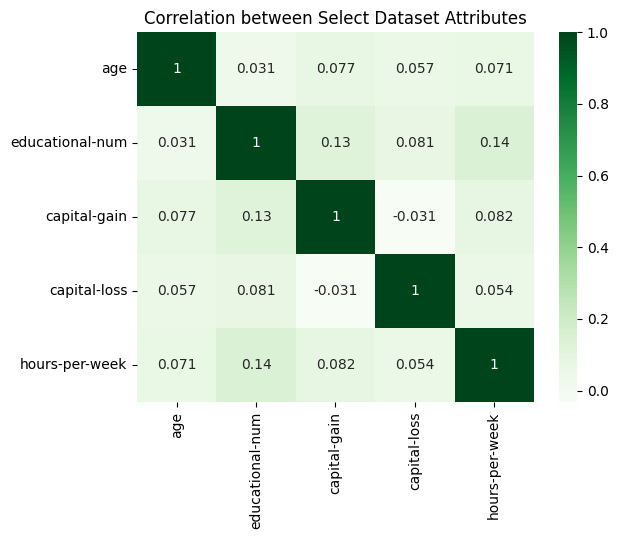

In [19]:
# Heatmap of the selected correlations
sns.heatmap(corr_model, cmap = 'Greens', annot = True)
plt.title("Correlation between Select Dataset Attributes")
plt.show()

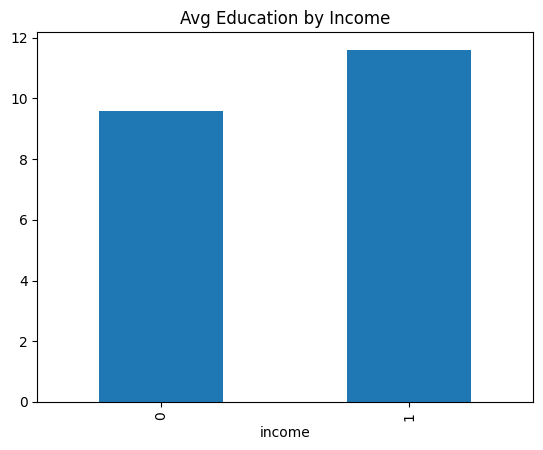

In [20]:
#Plot the average educational level per income bracket
# Less than 50K is '0' and Greater than 50k is '1'
df.groupby('income')['educational-num'].mean().plot(kind="bar")
plt.title("Avg Education by Income")
plt.show()

The graph above displays an average of income greater than $50k based on higher education levels. 

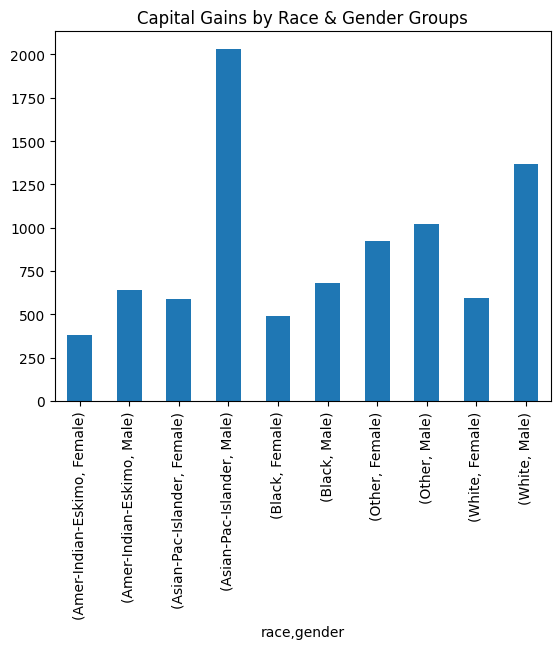

In [21]:
# Plot Capital gains by Race & Gender
df.groupby(['race','gender'])['capital-gain'].mean().plot(kind="bar")
plt.title("Capital Gains by Race & Gender Groups")
plt.show()

Based on the bar graph above it displays Male Asian-Pacific Islanders having the highest capital gains in the dataset. Second being White Males.

In [22]:
#Create a pivot table for education and gender with average hours-per-week as values
edu_gender = pd.pivot_table(data=df,index='education',columns='gender',values='hours-per-week',aggfunc='mean')
edu_gender

gender,Female,Male
education,,
10th,31.925602,39.467811
11th,29.129231,36.650602
12th,31.414286,37.334831
1st-4th,32.694915,40.672043
5th-6th,36.299213,39.765789
7th-8th,35.464435,40.184615
9th,35.031818,39.725746
Assoc-acdm,37.583732,42.886037
Assoc-voc,37.989101,43.690799


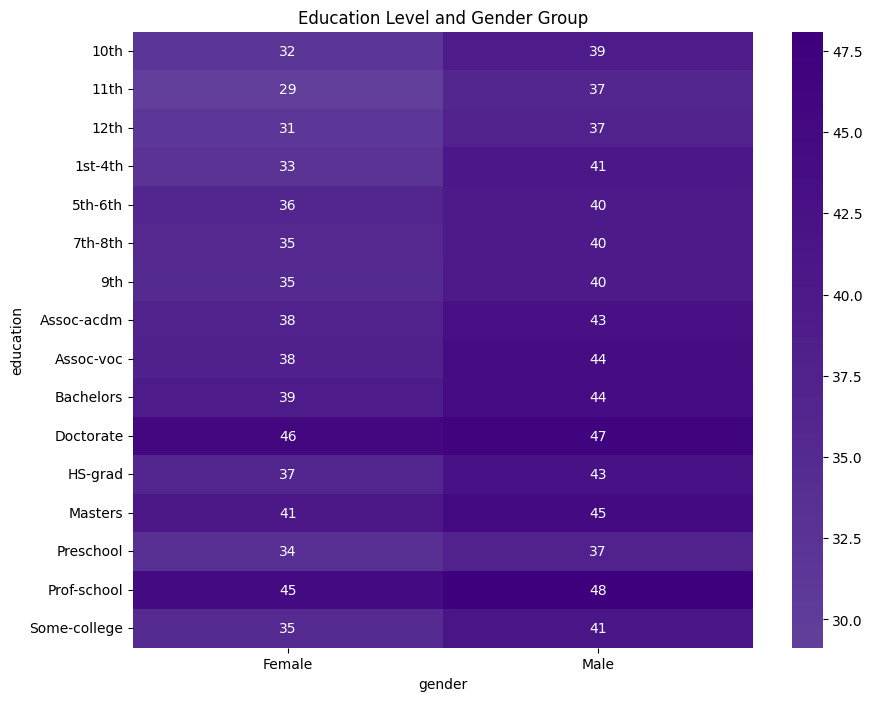

In [23]:
#Create a heatmap to visualize education, gender and weekly hours
plt.figure(figsize=[10,8])
sns.heatmap(edu_gender,annot=True,cmap='Purples',center=0.117)
plt.title("Education Level and Gender Group")
plt.show()

Based on the heatmap displayed above one can see a high correlation of male & females with a Doctorate and Professional School education pull the most weekly hours. 

# **Comparing Models**
- Evaluate multiple types of models on your data
- Evaluate each model with multiple appropriate metrics on BOTH the train and test data.
- Use GridSearchCV to tune some of the hyperparameters of each model.
- Display the metrics of your best tuned version of each model type.
- Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results.
- Choose your "production" model and justify this decision using the metrics most important to your business problem.

In [24]:
# Defining features matrix (X) and income for target vector (y)
df_backup = df.copy()

X = df.drop(columns = ['income'])
y = df['income']

## **Split Data into Training and Testing Sets**

In [25]:
# Splitting data into train and test sets while using random number 42 for consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## **Scale the Data**

# Unengineered Dataset

In [26]:
# On numeric
scaler = StandardScaler()
num_selector = make_column_selector(dtype_include="number")
num_tuple = (scaler, num_selector)

# On nominal
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
nom_pipeline = make_pipeline(ohe, scaler)
nom_selector = make_column_selector(dtype_include="object")
nom_tuple = (nom_pipeline, nom_selector)

# Instantiate the make column transformer
unengineered_preprocessor = make_column_transformer(num_tuple, nom_tuple, remainder="drop", verbose_feature_names_out=False)
# Fit to X train
unengineered_preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7faa48737340>),
                                ('pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7faa487342b0>)],
                  verbose_feature_names_out=False)

In [27]:
bagreg = BaggingRegressor()

#unengineered
unengineered_bagreg_pipe = make_pipeline(unengineered_preprocessor, bagreg)
unengineered_bagreg_pipe.fit(X_train, y_train)
unengineered_bt_train_pred = unengineered_bagreg_pipe.predict(X_train)
unengineered_bt_test_pred = unengineered_bagreg_pipe.predict(X_test)

#evaluation
print('\nUnengineered Bagging Tree Train Evaluation')
evaluate_model(y_train, unengineered_bt_train_pred)
print('\n')
print('\nUnengineered Bagging Tree Test Evaluation')
evaluate_model(y_test, unengineered_bt_test_pred)


Unengineered Bagging Tree Train Evaluation
 MAE: 0.06911346742457368, 
 MAPE: 159961970804914.6, 
 MSE: 0.019098231853957152, 
 RMSE: 0.13819635253492457, 
 R2: 0.8950402127404582



Unengineered Bagging Tree Test Evaluation
 MAE: 0.18552768213368312, 
 MAPE: 420847933698315.4, 
 MSE: 0.10816035415641907, 
 RMSE: 0.3288774150902112, 
 R2: 0.40735897307480995


# Engineered Dataset

In [28]:
#on numeric
scaler = StandardScaler()
num_selector = make_column_selector(dtype_include="number")
num_tuple = (scaler, num_selector)

#on nominal
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
nom_pipeline = make_pipeline(ohe, scaler)
nom_selector = make_column_selector(dtype_include="object")
nom_tuple = (nom_pipeline, nom_selector)

# Instantiate the make column transformer
engineered_preprocessor = make_column_transformer(num_tuple, nom_tuple, remainder="drop", verbose_feature_names_out=False)
# Fit to X train
engineered_preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7faa48692a40>),
                                ('pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7faa8c957430>)],
                  verbose_feature_names_out=False)

In [29]:
bagreg = BaggingRegressor()

#engineered
engineered_bagreg_pipe = make_pipeline(engineered_preprocessor, bagreg)
engineered_bagreg_pipe.fit(X_train, y_train)
engineered_bt_train_pred = engineered_bagreg_pipe.predict(X_train)
engineered_bt_test_pred = engineered_bagreg_pipe.predict(X_test)
#evaluation
print('\nEngineered Bagging Tree Train Evaluation')
evaluate_model(y_train, engineered_bt_train_pred)
print('\n')
print('\nEngineered Bagging Tree Test Evaluation')
evaluate_model(y_test, engineered_bt_test_pred)


Engineered Bagging Tree Train Evaluation
 MAE: 0.06932480687946363, 
 MAPE: 160322993949507.72, 
 MSE: 0.019181241801486667, 
 RMSE: 0.13849636024634968, 
 R2: 0.8945840078676852



Engineered Bagging Tree Test Evaluation
 MAE: 0.1841039514674537, 
 MAPE: 419678774916547.3, 
 MSE: 0.10566896212493852, 
 RMSE: 0.32506762700234937, 
 R2: 0.42101001132746385


**Comparison Results**
- Engineered data has better metrics across the board.
- Most significant being engineered R2 testing slightly higher at .42 compared to unengineered at .40

# KNN Model

In [30]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(engineered_preprocessor, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)
# Save the model's predictions for the train dataset
train_preds = knn_pipe.predict(X_train)
# Save the model's predictions for the test dataset
test_preds = knn_pipe.predict(X_test)

In [31]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7faa48692a40>),
                                   ('pipeline',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False)),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7faa8c957430>)],
                     verbose_feature_names_out=False)),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('stan

In [32]:
# Create a dictionary of parameters

params = {'kneighborsclassifier__n_neighbors': range(1,20),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [33]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7faa48692a40>),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7faa8c957430>)],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 20),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [34]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 15,
 'kneighborsclassifier__weights': 'uniform'}

In [35]:
knn_gs.best_score_

0.8324768977821355

In [36]:
best_knn = knn_gs.best_estimator_
best_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faa8c9230a0>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faa8c923ee0>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=15))])

In [37]:
evluate_classification(best_knn, X_train, X_test, y_train, y_test)

Training Accuracy: 0.851
Test Accuracy: 0.831


CPU times: user 9.21 s, sys: 34.7 ms, total: 9.24 s
Wall time: 6.23 s


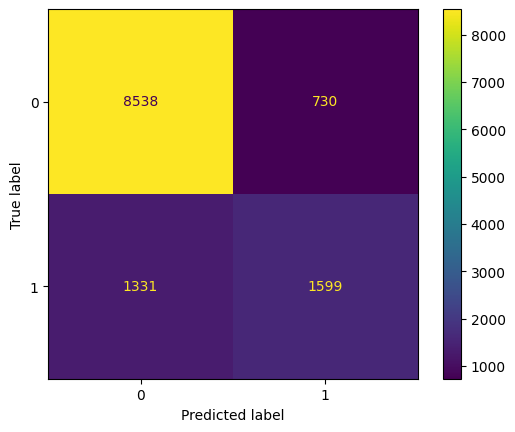

In [57]:
# on tuned knn

%%time
tuned_knn_pred = best_knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, tuned_knn_pred);

## **KNN Model with PCA**

In [43]:
df_backup = df.copy()

X = df.drop(columns = ['income'])
y = df['income']

In [51]:
#on numeric
scaler = StandardScaler()
num_selector = make_column_selector(dtype_include="number")
num_tuple = (scaler, num_selector)

#on nominal
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
nom_pipeline = make_pipeline(ohe, scaler)
nom_selector = make_column_selector(dtype_include="object")
nom_tuple = (nom_pipeline, nom_selector)

# Instantiate the make column transformer
scaled_engineered_preprocessor = make_column_transformer(num_tuple, nom_tuple, remainder="drop", verbose_feature_names_out=False)
# Fit to X train
scaled_engineered_preprocessor.fit_transform(X)

# Instantiate & fit data using PCA
pca = PCA(n_components=.80)

In [52]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Create a transformer pipeline
transformer = make_pipeline(scaler, pca)
#Put PCA Pipeline in Another Pipeline
knn = KNeighborsClassifier()
# Create a modeling pipeline
knn_pca_pipe = make_pipeline(scaled_engineered_preprocessor, knn)
knn_pca_pipe.fit(X_train, y_train)
#evaluate model
print('Training accuracy:', knn_pca_pipe.score(X_train, y_train))
print('Testing accuracy:', knn_pca_pipe.score(X_test, y_test))

Training accuracy: 0.8754099256668124
Testing accuracy: 0.823413674372848


CPU times: user 9.24 s, sys: 18.9 ms, total: 9.26 s
Wall time: 5.23 s


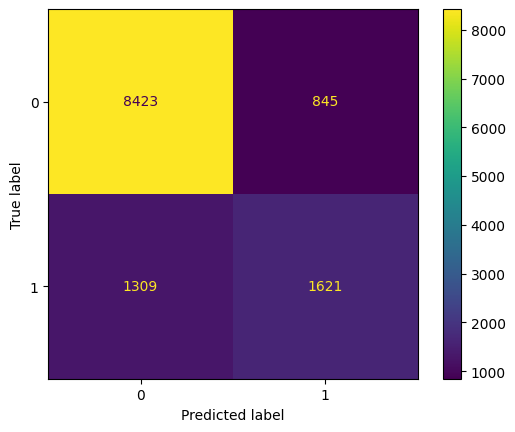

In [56]:
%%time
knn_pca_pred = knn_pca_pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, knn_pca_pred);

Based on the engineered models above, they have tested closely together for accuracy. One being tuned and tested KNN Model at 83% accuracy rate with less False Positives. Whereas, the other model tested with Principal Component Analysis (PCA) at 82% accuracy rate with higher False Positives. Although, KNN model with PCA definitely is a shorter process in obtaining results.

Based on the data exploration, suggest stakeholders utilize tuned and tested engineered KNN Model with higher accuracy rate. Would suggest analyzing further into Asian Pacific Islander Males to see the correlation between Capital Gains and Income influences as they seem to rank high in this dataset. 